<a href="https://colab.research.google.com/github/Ndy-S/machine-learning-fundamental/blob/main/Introduction%20to%20TensorFlow%20for%20Artificial%20Intelligence%2C%20Machine%20Learning%2C%20and%20Deep%20Learning/W2_intro_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computer Vision

## An Introduction to Computer Vision

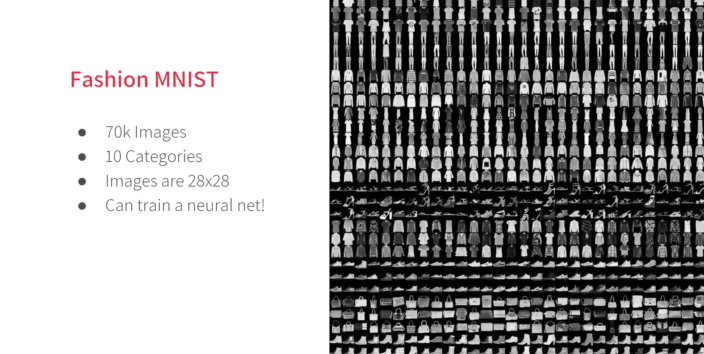

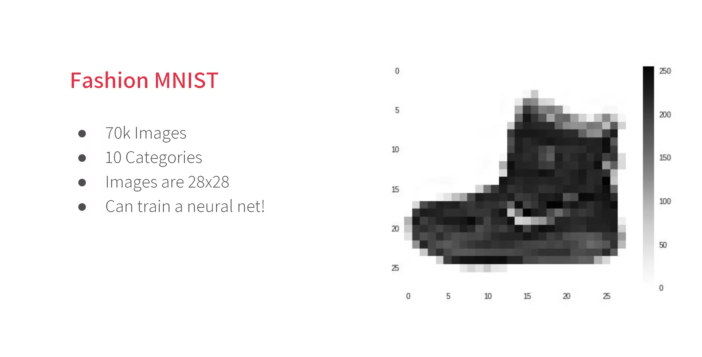

In [1]:
# SECTION DIVIDER

## Writing Code to Load Training Data

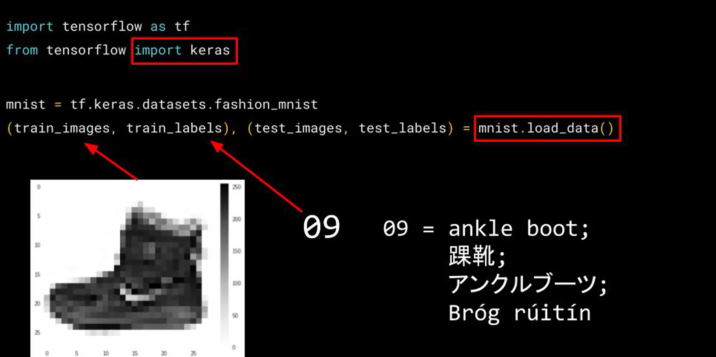

In [2]:
# SECTION DIVIDER

## Coding a Computer Vision Neural Network

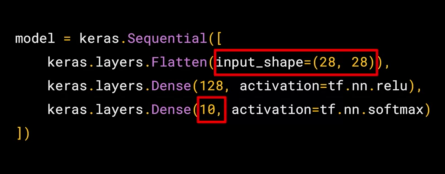

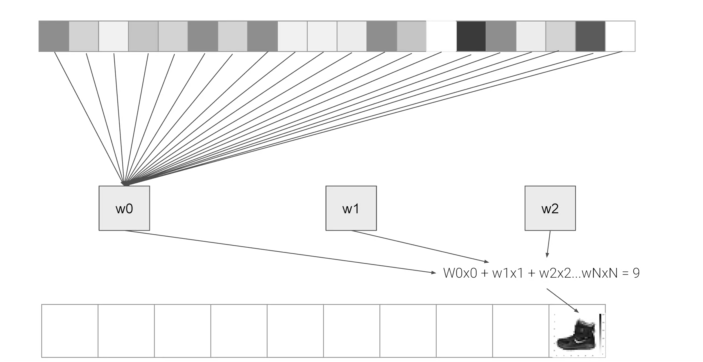

In [3]:
# SECTION DIVIDER

## Beyond Hello World, Computer Vision Code

In [6]:
import tensorflow as tf

print(tf.__version__)

2.13.0


In [8]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


LABEL: 9

IMAGE PIXEL ARRAY: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1  

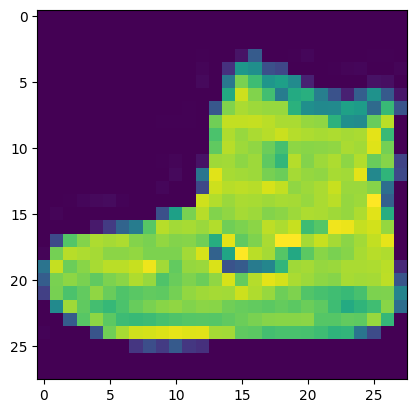

In [9]:
import numpy as np
import matplotlib.pyplot as plt

index = 0
np.set_printoptions(linewidth=320)

print(f"LABEL: {training_labels[index]}")
print(f"\nIMAGE PIXEL ARRAY: {training_images[index]}")

plt.imshow(training_images[index])

In [10]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [11]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [13]:
# Softmax function example
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [14]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4965 - accuracy: 0.8271
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3763 - accuracy: 0.8634
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3378 - accuracy: 0.8763
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3137 - accuracy: 0.8847
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2947 - accuracy: 0.8902


In [15]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3663 - accuracy: 0.8700


[0.36632248759269714, 0.8700000047683716]

In [18]:
# Exercise 1
classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

313/313 [==============================] - 2s 4ms/step
[8.5382527e-07 4.2187716e-09 5.9082038e-07 2.1834914e-07 2.4622315e-07 1.4228483e-02 6.5897893e-07 1.0890469e-02 1.8150944e-05 9.7486031e-01]
9


In [20]:
# Exercise 2
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.4713
Epoch 2/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3586
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3220
Epoch 4/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2962
Epoch 5/5
313/313 [==============================] - 3s 7ms/step
[5.1313669e-09 1.3815497e-09 2.6383951e-09 3.8914102e-10 6.7179984e-10 6.6064494e-03 4.8526130e-09 7.5605111e-03 1.9167066e-08 9.8583305e-01]
9


In [21]:
# Exercise 3
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), #Try removing this layer
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

In [22]:
# Exercise 4
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # Try experimenting with this layer
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5207
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3900
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3518
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3275
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
[4.3193646e-05 2.4048116e-08 1.0285355e-06 4.4322885e-08 4.2161432e-06 2.9905040e-02 6.8654135e-06 9.3192598e-03 1.5909926e-04 9.6056128e-01]
9


In [23]:
# Exercise 5


fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    # Add a layer here,
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    # Add a layer here
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4672
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3558
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3181
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2939
Epoch 5/5
313/313 [==============================] - 2s 5ms/step
[1.9479973e-09 4.8212017e-09 2.0249518e-09 2.1570798e-09 4.6145957e-10 6.9516085e-05 4.9138169e-09 3.6740003e-03 7.3993540e-09 9.9625641e-01]
9


In [24]:
# Exercise 6
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=15) # Experiment with the number of epochs

model.evaluate(test_images, test_labels)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4925
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3738
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3322
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3118
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2922
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2797
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2665
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2548
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2454
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2401
Epoch 11/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2301
Epoch 12/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2228


0.3755857050418854

In [26]:
# Exercise 7
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

# training_images=training_images/255.0 # Experiment with removing this line
# test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 3.6830
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5504
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5168
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4987
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
[1.4161967e-18 6.7056502e-14 4.9863655e-17 1.9450279e-13 2.1125200e-17 8.3121937e-03 4.1487414e-16 1.1456167e-02 7.3225036e-13 9.8023164e-01]
9


In [27]:
# Exercise 8
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.6): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1873/1875 [============================>.] - ETA: 0s - loss: 0.4771 - accuracy: 0.8306
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4769 - accuracy: 0.8307


In [28]:
# SECTION DIVIDER

## Using Callbacks to Control Training

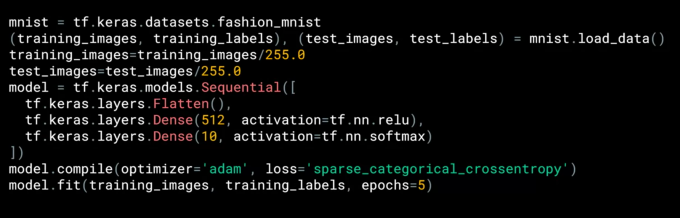

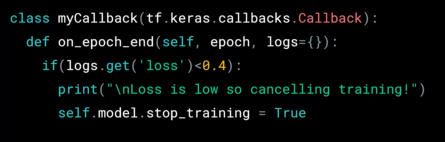

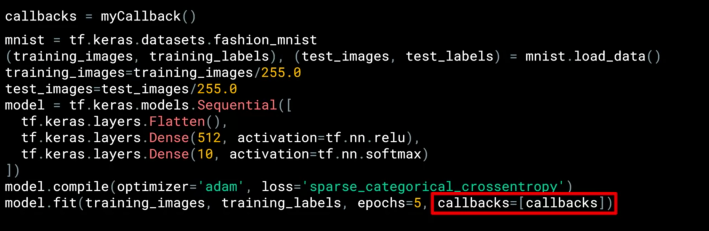

In [5]:
# SECTION DIVIDER

## Implement Callbacks Code

In [29]:
import tensorflow as tf

fmnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fmnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

In [30]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.4):
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [31]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
# Train the model with a callback
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.4756 - accuracy: 0.8290
Epoch 2/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.3611 - accuracy: 0.8672
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3608 - accuracy: 0.8674


In [33]:
# SECTION DIVIDER

## Implementing Callbacks in TensorFlow using the MNIST Dataset